## Implementation of SVC

### Accessing the Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
db = pd.read_csv('diabetes.csv')

In [5]:
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Pre-processing the data

In [6]:
y = db['Outcome']

In [7]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
X = db.drop(['Outcome'], axis = 1)

In [10]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
X.shape

(768, 8)

In [15]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Splitting the Data to Train and Test

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 10)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### Building the model

In [36]:
from sklearn.svm import SVC

svc_lin = SVC(kernel = 'linear', probability = True) # if not mentioned, probability default is taken as False
svc_lin = svc_lin.fit(X_train, y_train)
y_pred = svc_lin.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [33]:
y_pred_prob = svc_lin.predict_proba(X_test)
y_pred_prob

array([[0.45690209, 0.54309791],
       [0.78923127, 0.21076873],
       [0.5220331 , 0.4779669 ],
       [0.8789867 , 0.1210133 ],
       [0.88546062, 0.11453938],
       [0.93821624, 0.06178376],
       [0.89806133, 0.10193867],
       [0.68693638, 0.31306362],
       [0.91982646, 0.08017354],
       [0.61016967, 0.38983033],
       [0.9090495 , 0.0909505 ],
       [0.74195631, 0.25804369],
       [0.14525019, 0.85474981],
       [0.68511014, 0.31488986],
       [0.87544586, 0.12455414],
       [0.31680804, 0.68319196],
       [0.25279116, 0.74720884],
       [0.93860485, 0.06139515],
       [0.8881281 , 0.1118719 ],
       [0.10763468, 0.89236532],
       [0.663358  , 0.336642  ],
       [0.52129759, 0.47870241],
       [0.68548252, 0.31451748],
       [0.788817  , 0.211183  ],
       [0.82869637, 0.17130363],
       [0.37130386, 0.62869614],
       [0.72374259, 0.27625741],
       [0.98506829, 0.01493171],
       [0.35747308, 0.64252692],
       [0.20933014, 0.79066986],
       [0.

In [31]:
y_test

568    0
620    0
456    0
197    1
714    0
      ..
264    1
706    1
194    0
179    1
514    0
Name: Outcome, Length: 154, dtype: int64

### Calculating the performance

The Report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.82        95
           1       0.79      0.51      0.62        59

    accuracy                           0.76       154
   macro avg       0.77      0.71      0.72       154
weighted avg       0.77      0.76      0.75       154

The ROC-AUC-Score: 0.7121320249776985


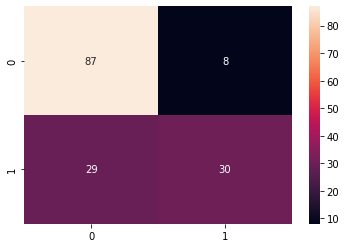

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

cm = confusion_matrix (y_test, y_pred)
report = classification_report(y_test, y_pred)
score = roc_auc_score (y_test, y_pred)
fpr, tpr, _ = roc_curve (y_test, y_pred_prob[:,1]) # ROC curve comes as a triplet.

sns.heatmap(cm, annot = True);
print ('The Report:\n', report)
print ('The ROC-AUC-Score:', score)

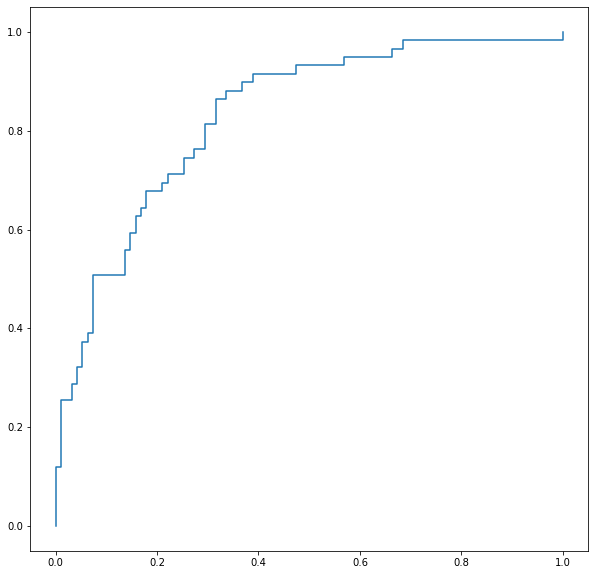

In [40]:
plt.figure(figsize = (10, 10))
plt.plot(fpr, tpr);

### Hyper-parameter tuning

#### Kernel

In [41]:
def SVC_tuning_kernel (a):
    model = SVC(kernel = a)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    score = roc_auc_score (y_test, y_pred)
    print ('The SVC with Kernel:', a)
    print ()
    print (' ************** ')
    print ('Confusion Matrix: \n', cm)
    print ('The report: \n', report)
    print ('The ROC-AUC-Score:', score)
    sns.heatmap(cm, annot = True);

The SVC with Kernel: linear

 ************** 
Confusion Matrix: 
 [[87  8]
 [29 30]]
The report: 
               precision    recall  f1-score   support

           0       0.75      0.92      0.82        95
           1       0.79      0.51      0.62        59

    accuracy                           0.76       154
   macro avg       0.77      0.71      0.72       154
weighted avg       0.77      0.76      0.75       154

The ROC-AUC-Score: 0.7121320249776985


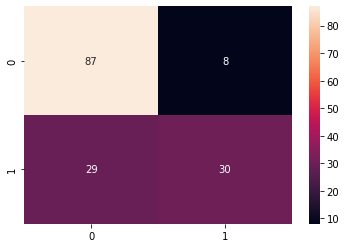

In [42]:
# Calling the function

SVC_tuning_kernel ('linear')

The SVC with Kernel: poly

 ************** 
Confusion Matrix: 
 [[88  7]
 [38 21]]
The report: 
               precision    recall  f1-score   support

           0       0.70      0.93      0.80        95
           1       0.75      0.36      0.48        59

    accuracy                           0.71       154
   macro avg       0.72      0.64      0.64       154
weighted avg       0.72      0.71      0.68       154

The ROC-AUC-Score: 0.6411239964317573


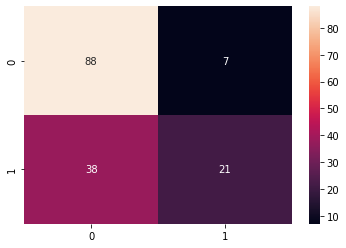

In [43]:
SVC_tuning_kernel ('poly')

The SVC with Kernel: rbf

 ************** 
Confusion Matrix: 
 [[87  8]
 [37 22]]
The report: 
               precision    recall  f1-score   support

           0       0.70      0.92      0.79        95
           1       0.73      0.37      0.49        59

    accuracy                           0.71       154
   macro avg       0.72      0.64      0.64       154
weighted avg       0.71      0.71      0.68       154

The ROC-AUC-Score: 0.6443354148082068


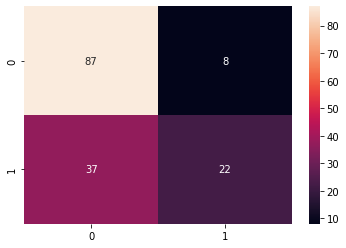

In [45]:
SVC_tuning_kernel ('rbf')

The SVC with Kernel: sigmoid

 ************** 
Confusion Matrix: 
 [[72 23]
 [52  7]]
The report: 
               precision    recall  f1-score   support

           0       0.58      0.76      0.66        95
           1       0.23      0.12      0.16        59

    accuracy                           0.51       154
   macro avg       0.41      0.44      0.41       154
weighted avg       0.45      0.51      0.47       154

The ROC-AUC-Score: 0.4382694023193577


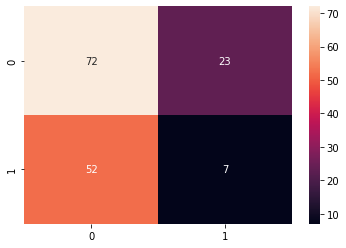

In [46]:
SVC_tuning_kernel ('sigmoid')

The best kernel after tuning is the linear

In [54]:
# Tuning regularization parameter

def SVC_tuning_C (C_list):
    for c in C_list:
        model = SVC(kernel = 'linear', C = c)
        model = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = roc_auc_score(y_test, y_pred)
        print ('C:', c, '===>', 'Score:', score)

In [55]:
C_list = [0.1,1,2,3,4,5,10,15,20,25,30]

In [56]:
SVC_tuning_C(C_list)

C: 0.1 ===> Score: 0.703657448706512
C: 1 ===> Score: 0.7121320249776985
C: 2 ===> Score: 0.7068688670829617
C: 3 ===> Score: 0.7068688670829617
C: 4 ===> Score: 0.7068688670829617
C: 5 ===> Score: 0.7068688670829617
C: 10 ===> Score: 0.7016057091882248
C: 15 ===> Score: 0.7121320249776985
C: 20 ===> Score: 0.7068688670829617
C: 25 ===> Score: 0.7068688670829617


KeyboardInterrupt: 

In [ ]:
SVC_tuning_C([18, 19, 21, 22])

After tuning, the best value of C is 20.

So, the best model is the one with kernel = 'linear' and C = 20

### The Final Model

In [ ]:
svc = SVC(kernel = 'linear', C = 20, probability = True)
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_pred_prob = svc.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
score = roc_auc_score (y_test, y_pred)
report = classification_report(y_test, y_pred)
fpr, tpr, _ = roc_curve (y_test, y_pred_prob[:,1])

print ('The Confusion Matrix:')
sns.heatmap(cm, annot = True)
print ('ROC-AUC-Score:', score)
print ('The report:', report)